# Fera formidável 4.6: E se meus dados forem imagens?

**Autores:** Ana Luiza Poletto e Gabriel Viégas

**Objetivo:**  implementar uma rede neural convolucional (CNN) utilizando `PyTorch` ou `lightning`. Treine esta rede neural em um conjunto de dados de imagens. Explique para o leitor como funciona a camada de convolução de uma CNN e o motivo de utilizarmos este tipo de arquitetura quando estudamos imagens.

**Introdução:**

As [Redes Neurais Convolucionais](https://www.youtube.com/watch?v=KuXjwB4LzSA) ou *Convolutional Neural Networks* (CNNs) são um tipo específico de arquitetura de Redes Neurais Artificiais (NNs), que por sua vez pertencem ao Aprendizado Profundo (*Deep Learning*) subcampo do Aprendizado de Máquina (ML). As CNNs são especializadas no processamento de dados com estrutura tridimensional (como imagens e  vídeos), onde utilizam operações de convolução para extrair características hierárquicas (como bordas, texturas e formas) e camadas de *pooling* para reduzir dimensionalidade, achatamento e posterior classificação. Dentre os exemplos de utilização estão a área de saúde para análise de imagens de exame e na indústria de automação de veículos, dentre tanto outros exemplos.

Quais são as suas [etapas](https://medium.com/@myringoleMLGOD/simple-convolutional-neural-network-cnn-for-dummies-in-pytorch-a-step-by-step-guide-6f4109f6df80)?

**Input (Entrada):** São os dados fornecidos à rede, como imagens de roupas, *dataset* utilizado neste trabalho.

**Camadas Convolucionais (Conv):** Aplicam filtros (ou kernels) sobre a imagem para extrair características específicas, como a detecção de bordas.

**Canais (*Channels*):** Referem-se às dimensões adicionais que representam diferentes tipos de informação. Imagens coloridas (RGB), por exemplo, têm três canais. Imagens em tons de cinza usam apenas um canal, como será mostrado mais adiante neste trabalho.

**Padding "valid":** Tipo de preenchimento em que nenhum valor extra é adicionado às bordas da imagem, o que reduz as dimensões da saída.

**Camadas de *Pooling* (*Max-Pooling*):** Reduzem a dimensionalidade dos dados, preservando as características mais relevantes. Isso torna a rede mais eficiente e menos propensa a overfitting.

**Flattened (achatamento)**: Processo em que a matriz é transformada em um vetor unidimensional.

**Camadas *Fully Connected* (FC):** Camadas totalmente conectadas, nas quais cada neurônio é ligado a todos os neurônios da camada anterior. Utilizadas no final para realizar a classificação.

**ReLU :** A função de ativação *Rectified Linear Unit* introduz não-linearidade na rede, permitindo que ela aprenda relações mais complexas entre os dados.



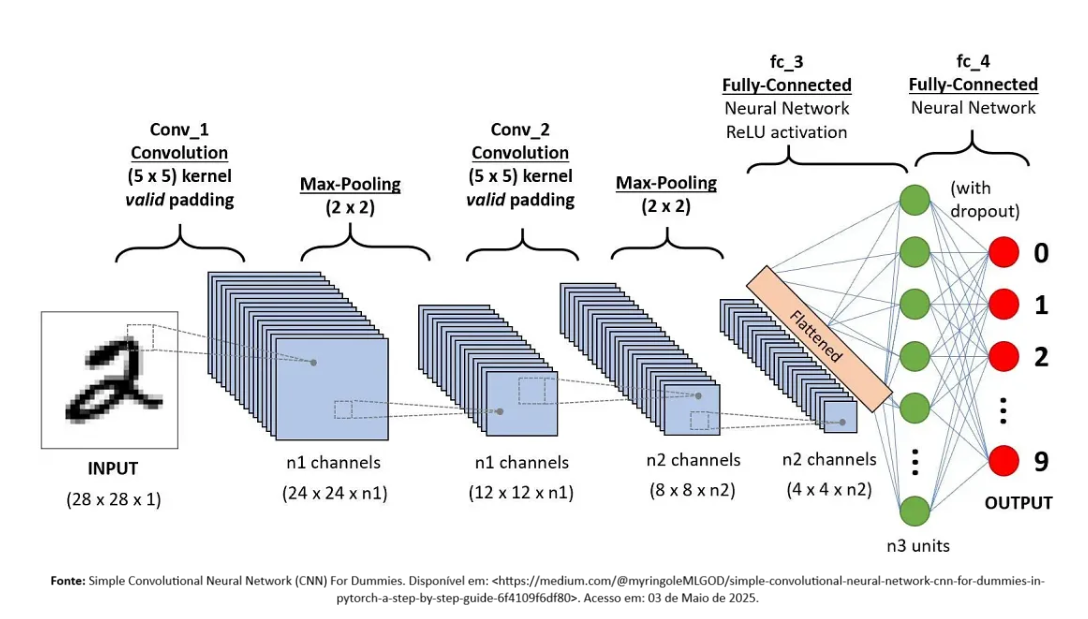

Nossa implementação de CNN está seguindo como base a referência [Simple Convolutional Neural Network (CNN) For Dummies](https://medium.com/@myringoleMLGOD/simple-convolutional-neural-network-cnn-for-dummies-in-pytorch-a-step-by-step-guide-6f4109f6df80). Fizemos, porém, algumas alterações importantes:

- Primeiro, nosso *dataset* de teste é o [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), que se propõe a ter a mesma qualidade de dados que faz o MNIST ser um *dataset* tão utilizado para o *benchmarking* de modelos de aprendizado de máquina, mas com uma dificuldade maior.
- Segundo, utilizamos o `nn.Sequential` para criar as camadas do modelo de uma maneira mais visualmente organizada, sem poluir a função de `forward()`.
- Terceiro, instituímos a estratégia de *Dropout*, que constitui em zerar certos valores do input para reduzir a chance de *overfitting*.

Feitas essas considerações, passamos ao código em si. Primeiro, importamos as bibliotecas e módulos necessários:

In [ ]:
import torch
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

Depois, definimos parâmetros gerais importantes para nossos dados:
- SEED: semente aleatória
- INPUT_SIZE, BATCH_SIZE: parâmetros que definem o tamanho de cada imagem, a quantidade de informação que passará em cada *batch*
- NUM_CHANNELS, NUM_CLASSES: números de canais da imagem (para imagens em escala de cinza, há apenas 1 canal) e o número de classes que podem ser observadas nos dados
- LEARNING_RATE, EPOCHS: parâmetros que serão utilizados na época de treino

In [ ]:
SEED = 241006

INPUT_SIZE = 784  # 28x28 pixels (not directly used in CNN)
BATCH_SIZE = 128 # number of images on each batch
NUM_CHANNELS = 1 # number of channels
NUM_CLASSES = 10  # digits 0-9

LEARNING_RATE = 0.001
EPOCHS = 15  # Reduced for demonstration purposes

Definidos esses parâmetros gerais, podemos realizar a divisão dos dados em treino, validação e teste. Os dados do FashionMNIST são divididos naturalmente entre treino (60000 observações) e teste (10000 observações), portanto foi necessário dividir os dados de teste entre validação e teste final.

Antes de dividí-los porém, devemos definir uma transformação importante para nossos dados. O método `transforms.Compose` une duas transformações em uma: a primeira, transforma nossos dados de imagem para tensores do `PyTorch` (`ToTensor`), e a segunda normaliza os dados para que tenham um desvio padrão e uma média de 0.5, o que facilita o treinamento da CNN e melhora sua performance, como visto em: [Understanding transform.Normalize()](https://discuss.pytorch.org/t/understanding-transform-normalize/21730).

In [ ]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

 Abaixo, o processo de divisão utilizando o `DataLoader` do `PyTorch`:

In [ ]:
# Train dataset
train_dataset = datasets.FashionMNIST(root="dataset/", download=True, train=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Validation and test dataset
test_validation_dataset = datasets.FashionMNIST(root="dataset/", download=True, train=False, transform=transform)
indexes = range(len(test_validation_dataset))
test_indices, validation_indices = train_test_split(indexes, test_size=0.5, random_state=SEED)

# Creating validation's Subset and loader
validation_dataset = torch.utils.data.Subset(test_validation_dataset, validation_indices)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Creating test's Subset and loader
test_dataset = torch.utils.data.Subset(test_validation_dataset, test_indices)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.54MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 138kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.57MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.71MB/s]


Preparados os dados, passamos ao modelo em si. Assim como a referência, é uma CNN com 2 camadas convolucionais e 1 camada conectada. A primeira camada convolucional recebe os dados de entrada (1 canal) e retorna 8 canais, com um *kernel* de 3x3, *stride* de 1 e *padding* de 1. A segunda camada recebe os 8 canais e devolve 16, com os mesmos valores de *kernel*, *stride* e *padding*. Ambas tem a função de ativação ReLU e passam por uma camada de *pooling* de valor máximo que reduz a quantidade de *pixels* pela metade.

Após isso, temos o "achatamento" desse vetor *batch*x16x7x7 para um vetor do tamanho do *batch* e 784 amostras.

In [ ]:
class CNN(nn.Module):
    def __init__(self, in_channels: int, num_classes=10):
        """
        Defining the layers of the CNN.

        Args:
            in_channels (int): number of channels in the input image (greyscale images=1; RGB=3).
            num_classes: number of classes existing in the dataset.
        """
        super().__init__()

        self.layers = nn.Sequential(
            # Convolutional layers

            # First convolutional layer: 1 input channel, 8 output channels, 3x3 kernel, stride 1, padding 1 w/ ReLU activation & max pooling
            nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Randomly drops out some input elements with a 20% probability
            nn.Dropout(0.2),

            # Second convolutional layer: 8 input channels, 16 output channels, 3x3 kernel, stride 1, padding 1 w/ ReLU activation & max pooling
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Randomly drops out some input elements with a 20% probability
            nn.Dropout(0.2),

            # Flatten the tensor to put it through the linear layer: 16 channels * 7x7 pixels = 784 samples per image
            nn.Flatten(),

            # Connected layers

            # Fully Connected Layer 1: 784 entries (1 vector per image [28x28x1])
            nn.Linear(784, num_classes)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        """
        Define the forward pass of the neural network.

        Args:
            x: the input tensor.

        Returns:
            The output tensor.

        """
        x = self.layers(x)

        return x

Podemos agora definir o modelo, com o número de canais e classes conforme definidos acima:

In [ ]:
model = CNN(in_channels=NUM_CHANNELS, num_classes=NUM_CLASSES)

Abaixo, definimos o critério de perda e o otimizador. O critério de perda é a "Cross Entropy", ou Entropia Cruzada, uma maneira de calcular a perda de classificadores de redes neurais com maior penalização para erros de classe, de maneira que seja possível propagar o erro posteriormente. O otimizador é um otimizador estocástico utilizado principalmente em *deep learning*, que adapta a taxa de aprendizado de maneira dinâmica: [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Finalmente, passamos para a etapa de treinamento de nossa rede neural. Utilizaremos como métrica principal a acurácia do modelo.

In [ ]:
# Lists to contain metrics
train_losses = []
train_accuracies = []
validation_losses = []
validation_accuracies = []

# Training
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"Epoch [{epoch + 1}/{EPOCHS}]")
    for batch_index, (data, targets) in enumerate(tqdm(train_loader)):

        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = scores.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    # Evaluates metrics after each epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluation on validation set
    model.eval()
    validation_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in validation_loader:

            scores = model(data)
            loss = criterion(scores, targets)

            validation_loss += loss.item()
            _, predicted = scores.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    validation_loss = validation_loss / len(validation_loader)
    validation_accuracy = 100. * correct / total
    validation_losses.append(validation_loss)
    validation_accuracies.append(validation_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Test Loss: {validation_loss:.4f}, Test Acc: {validation_accuracy:.2f}%")

Epoch [1/15]


100%|██████████| 469/469 [00:28<00:00, 16.62it/s]


Train Loss: 0.7557, Train Acc: 73.30% | Test Loss: 0.4796, Test Acc: 83.20%
Epoch [2/15]


100%|██████████| 469/469 [00:28<00:00, 16.73it/s]


Train Loss: 0.4876, Train Acc: 82.22% | Test Loss: 0.4417, Test Acc: 83.94%
Epoch [3/15]


100%|██████████| 469/469 [00:27<00:00, 16.80it/s]


Train Loss: 0.4441, Train Acc: 83.90% | Test Loss: 0.4173, Test Acc: 85.46%
Epoch [4/15]


100%|██████████| 469/469 [00:29<00:00, 16.06it/s]


Train Loss: 0.4153, Train Acc: 84.99% | Test Loss: 0.4006, Test Acc: 86.72%
Epoch [5/15]


100%|██████████| 469/469 [00:27<00:00, 16.80it/s]


Train Loss: 0.3922, Train Acc: 85.95% | Test Loss: 0.3686, Test Acc: 87.16%
Epoch [6/15]


100%|██████████| 469/469 [00:27<00:00, 16.84it/s]


Train Loss: 0.3787, Train Acc: 86.41% | Test Loss: 0.3640, Test Acc: 87.04%
Epoch [7/15]


100%|██████████| 469/469 [00:27<00:00, 16.93it/s]


Train Loss: 0.3663, Train Acc: 86.94% | Test Loss: 0.3530, Test Acc: 87.78%
Epoch [8/15]


100%|██████████| 469/469 [00:27<00:00, 17.01it/s]


Train Loss: 0.3514, Train Acc: 87.48% | Test Loss: 0.3326, Test Acc: 88.12%
Epoch [9/15]


100%|██████████| 469/469 [00:28<00:00, 16.65it/s]


Train Loss: 0.3419, Train Acc: 87.68% | Test Loss: 0.3356, Test Acc: 88.62%
Epoch [10/15]


100%|██████████| 469/469 [00:30<00:00, 15.43it/s]


Train Loss: 0.3356, Train Acc: 87.90% | Test Loss: 0.3134, Test Acc: 88.56%
Epoch [11/15]


100%|██████████| 469/469 [00:27<00:00, 16.80it/s]


Train Loss: 0.3268, Train Acc: 88.39% | Test Loss: 0.3108, Test Acc: 88.74%
Epoch [12/15]


100%|██████████| 469/469 [00:34<00:00, 13.63it/s]


Train Loss: 0.3180, Train Acc: 88.54% | Test Loss: 0.3029, Test Acc: 89.32%
Epoch [13/15]


100%|██████████| 469/469 [00:32<00:00, 14.35it/s]


Train Loss: 0.3171, Train Acc: 88.70% | Test Loss: 0.3070, Test Acc: 89.30%
Epoch [14/15]


100%|██████████| 469/469 [00:27<00:00, 16.94it/s]


Train Loss: 0.3100, Train Acc: 88.93% | Test Loss: 0.3044, Test Acc: 89.26%
Epoch [15/15]


100%|██████████| 469/469 [00:29<00:00, 16.07it/s]


Train Loss: 0.3082, Train Acc: 88.85% | Test Loss: 0.2915, Test Acc: 89.42%


Vamos plotar agora as curvas de perda e acurácia por época, para ter uma noção visual de seu comportamento:

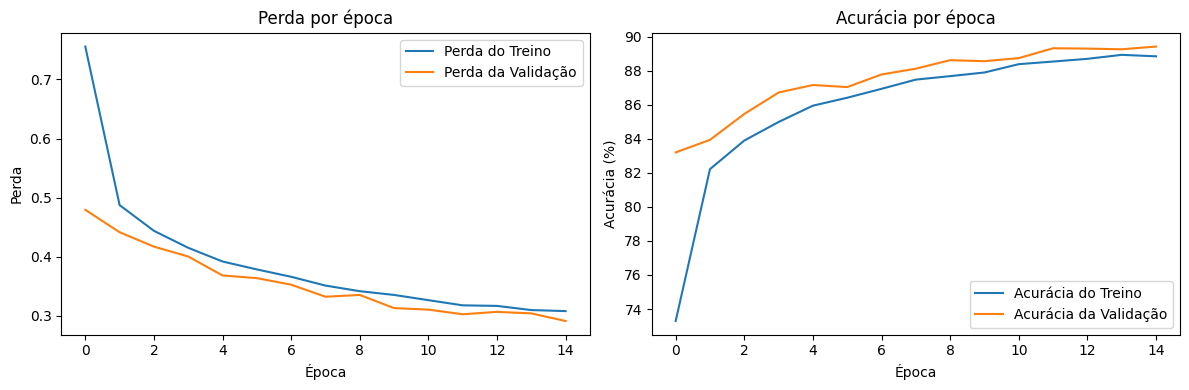

In [ ]:
# Plotando as curvas de treinamento
plt.figure(figsize=(12, 4))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Perda do Treino')
plt.plot(validation_losses, label='Perda da Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda por época')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Acurácia do Treino')
plt.plot(validation_accuracies, label='Acurácia da Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por época')
plt.legend()

plt.tight_layout()
plt.show()

A partir dos gráficos acima, podemos verificar que a acurácia do modelo frente aos dados de teste se mantém menor que a acurácia nos dados de validação. A estratégia *dropout* tem por maior objetivo evitar *overfitting* dos dados de treino, o que pode levar a uma acurácia menor, mas favorecer sua generalização, permitindo os resultados observados no conjunto de validação.

Podemos, finalmente, calcular a perda e a acurácia para o conjunto teste:

In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
y = []
y_pred =[]

with torch.no_grad():
    for data, targets in test_loader:
        y.extend(list(targets)) # takes all targets
        scores = model(data)
        loss = criterion(scores, targets)

        test_loss += loss.item()
        _, predicted = scores.max(1)
        y_pred.extend(list(predicted)) # takes all predictions
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

test_loss = test_loss / len(validation_loader)
test_accuracy = 100. * correct / total
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

Test Loss: 0.2837, Test Acc: 89.70%


Com uma acurácia de quase 90% no conjunto de treino, nosso modelo parece estar pelo menos razoável. Podemos verificar na matriz de confusão como o modelo avalia cada uma das categorias, visualizando se há maior erro em uma ou outra.

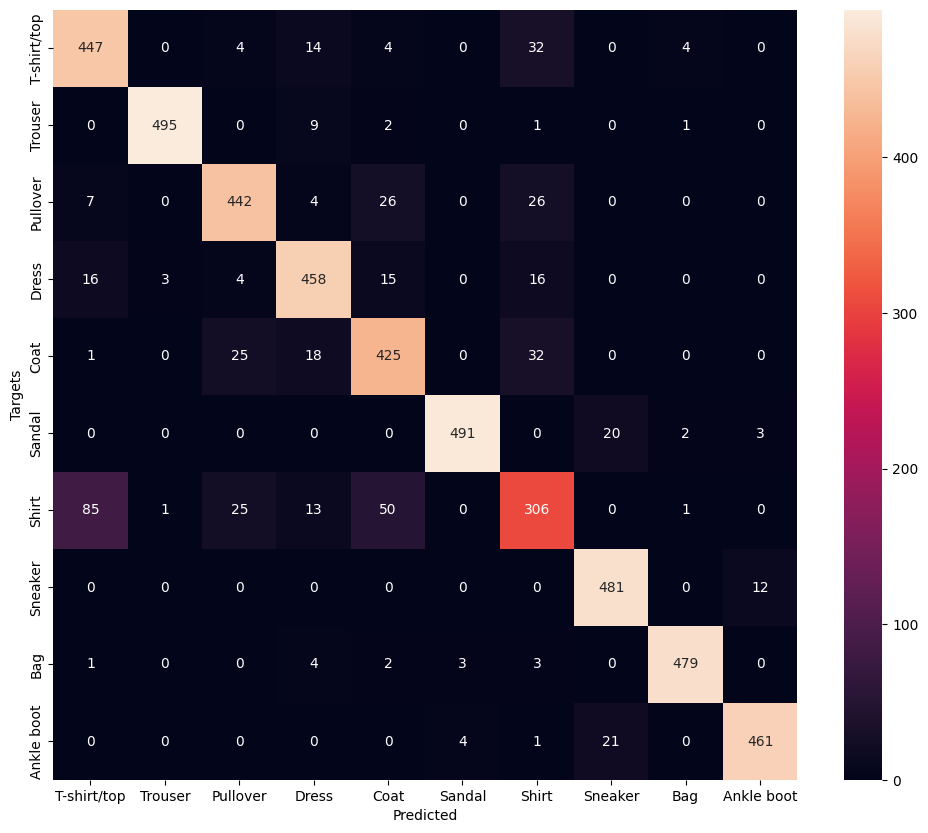

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

real = [labels[int(i)] for i in y]
pred = [labels[int(i)] for i in y_pred]

cf_matrix = confusion_matrix(real, pred, labels=list(labels.values()))

plt.figure(figsize=(12,10))
heatmap(cf_matrix, annot=True, fmt="", xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel("Predicted")
plt.ylabel("Targets");

A partir da matriz acima, pode-se perceber que o modelo parece conhecer bem o que é uma sandália (*sandal*), mas tem dificuldade em discernir uma blusa (*shirt*) das categorias de regata/top (*t-shirt/top*) e casaco (*coat*) principalmente, chegando a errar mais de 41% das observações do conjunto. Isso pode ocorrer devido a fatores como qualidade das blusas presentes no conjunto treino ou por outros motivos, como a própria similaridade visual entre blusas e casacos.



**Conclusão**:

Neste trabalho, desenvolvemos uma Rede Neural Convolucional (CNN) para classificar imagens do conjunto Fashion MNIST. Durante o processo, notamos a eficácia das camadas convolucionais e de *pooling* na captura de padrões visuais, que vão desde bordas simples até formas mais complexas. A arquitetura convolucional provou ser muito apropriada para trabalhar com imagens, pois tem a capacidade de manter as relações espaciais e ao mesmo tempo reduzir a quantidade de parâmetros necessários.

Os resultados obtidos reforçam a eficácia das CNNs em tarefas de classificação de imagens e destacam sua relevância no campo do processamento visual. Este projeto nos proporcionou uma compreensão prática e teórica sobre a aplicação de CNNs em problemas do mundo real. Além disso, a implementação de técnicas como *dropout* foi importante para prevenir o *overfitting*, o que resultou em uma melhoria significativa no desempenho em dados que não foram vistos durante o treinamento.

Futuramente, seria interessante testar outras arquiteturas para tentar chegar numa maior acurácia e melhorar a percepção do modelo da categoria "blusa".